<a href="https://colab.research.google.com/github/seokjinwoo/AIandEcon/blob/main/lec9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Classification 분류

- 기계학습, 지도학습, $Y$가 연속이 아닌 경우
  - qualitative 질적인 변수. discrete 이산적인 경우
  - 눈의 색: {검정, 갈색, 파랑}
  - 경제활동참가여부: {경제활동참가, 경제활동미참가},
  {경제활동참가, 경제활동미참가(육아휴직, 그냥 쉬었음,...)}
  - 이메일: {정상(ham), 스팸(spam)}

- $X$ 특성이 주어졌을 때, $Y$로 분류를 하는 분류기 $C(X)$
$$
C(X) \in C
$$

- 종종 $X$가 주어졌을 때 어느 범주에 속할 확률을 추정하는 경우가 많음





            





In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/Default.csv')

# 간단한 전처리(preprocessing)
df['default'] = df['default'].astype(str)

# 가로축: balance, 세로축: income을 산포도로 그리되
# 색깔은 default 값에 따라서 다르게 표시하시오
# Yes: red, No: blue





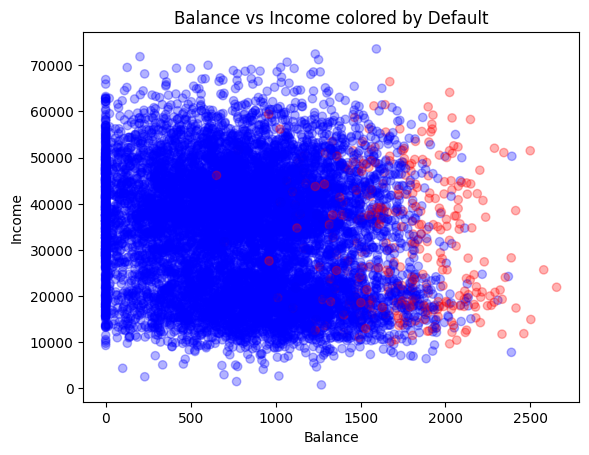

In [ ]:
# prompt: # 가로축: balance, 세로축: income을 산포도로 그리되
# # 색깔은 default 값에 따라서 다르게 표시하시오
# # Yes: red, No: blue

colors = {'Yes':'red', 'No':'blue'}

plt.scatter(df['balance'], df['income'], c=df['default'].apply(lambda x: colors[x]), alpha=0.3)
plt.xlabel('Balance')
plt.ylabel('Income')
plt.title('Balance vs Income colored by Default')
plt.show()

## Logistic regression model

- Default 를 분류하는 문제.
- Y = 1 if yes
- Y = 0 if No

- $X \rightarrow Y$ 에 어떻게 영향을 주는지를 훈련(추정)

---

- $p(X) = \Pr(Y=1|X)  $
- `balance` 가 주어졌을 때, `default`가 발생할 확률을 훈련(추정)

$$
p(X) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 X)}}
$$



---
- odd ratio: $p(X)/(1-p(X))$

- log-odd ratio는 선형함수가 됨
$$
\log \frac{p(X)}{(1-p(X))} = \beta_0 + \beta_1 X
$$






- 모형의 추정(훈련)은 maximum likelihood estimation 최우추정법을 사용하게 됨

- 데이터를 가장 잘 합리화 시킬 수 있는 모수를 찾는 과정.






In [ ]:
import statsmodels.formula.api as smf

df['default'] = df['default'].map({'Yes':1, 'No':0})

In [ ]:
model = smf.logit('default ~ balance + income', data=df)

results = model.fit()
print( results.summary() )



Optimization terminated successfully.
         Current function value: 0.078948
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9997
Method:                           MLE   Df Model:                            2
Date:                Tue, 13 May 2025   Pseudo R-squ.:                  0.4594
Time:                        07:43:21   Log-Likelihood:                -789.48
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                4.541e-292
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -11.5405      0.435    -26.544      0.000     -12.393     -10.688
balance        0.0056      0

- 가로축에 balance, 세로축에 default 를 표시하는 산포도.
- 추정된 모형의 예측값을 생성해서 확률곡선을 그리시오,.

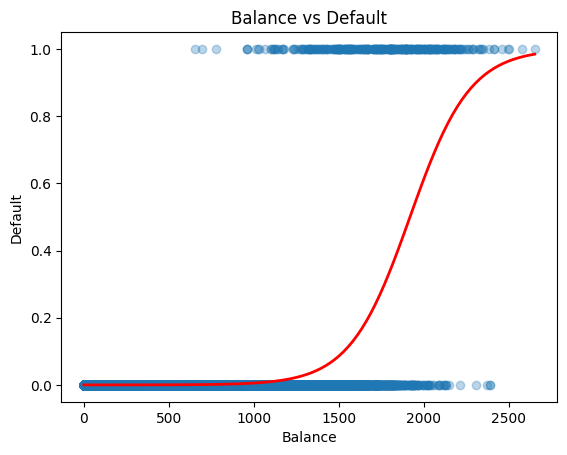

In [ ]:
# prompt: - 가로축에 balance, 세로축에 default 를 표시하는 산포도.
# - 추정된 모형의 예측값을 생성해서 확률곡선을 그리시오,.

import numpy as np

# 가로축에 balance, 세로축에 default 를 표시하는 산포도
plt.scatter(df['balance'], df['default'], alpha=0.3)
plt.xlabel('Balance')
plt.ylabel('Default')
plt.title('Balance vs Default')

# 추정된 모형의 예측값을 생성해서 확률곡선을 그립니다.
# 새로운 balance 값의 범위를 생성합니다.
balance_new = np.linspace(df['balance'].min(), df['balance'].max(), 100)
# income의 평균값을 사용합니다.
income_mean = df['income'].mean()

# 새로운 데이터프레임을 생성합니다.
new_data = pd.DataFrame({'balance': balance_new, 'income': income_mean})

# 예측 확률을 계산합니다.
predicted_probs = results.predict(new_data)

# 확률 곡선을 그립니다.
plt.plot(balance_new, predicted_probs, color='red', linewidth=2)
plt.show()

### 판별분석 discriminant analysis

- 베이즈 정리를 이용한 분류기
- $P(Y|X)$

- 베이즈 정리:

$$
\Pr(Y=k | X = x) = \frac{\Pr( X = x | Y = k ) \cdot \Pr(Y=k)}{\Pr(X=x)}
$$

- 판별분석에서는 이걸 어떻게 활용을 하느냐


$$
\Pr(Y=k | X = x) = \frac{ \pi_k  f_k(x)}{ \sum_{l=1}^K \pi_l  f_l(x) }
$$

- $x$가 하나인 경우

- $k$ 그룹에서 $x$의 분포가 정규분포를 따르는 경우,
$$
f_k (x) = \frac{1}{\sqrt{2 \pi \sigma_k^2}} \exp \left(-\frac{1}{2} (\frac{x - \mu_k }{\sigma_k})^2 \right)
$$
